# Importing Libraries

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [30]:
sns.set()

# Loading Files

In [3]:
for dirname, _, filenames in os.walk('/Users/azamkhan/github/dme/sentiment-movie/stanfordSentimentTreebank'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/azamkhan/github/dme/sentiment-movie/stanfordSentimentTreebank/datasetSplit.txt
/Users/azamkhan/github/dme/sentiment-movie/stanfordSentimentTreebank/dictionary.txt
/Users/azamkhan/github/dme/sentiment-movie/stanfordSentimentTreebank/STree.txt
/Users/azamkhan/github/dme/sentiment-movie/stanfordSentimentTreebank/datasetSentences.txt
/Users/azamkhan/github/dme/sentiment-movie/stanfordSentimentTreebank/README.txt
/Users/azamkhan/github/dme/sentiment-movie/stanfordSentimentTreebank/sentiment_labels.txt
/Users/azamkhan/github/dme/sentiment-movie/stanfordSentimentTreebank/original_rt_snippets.txt
/Users/azamkhan/github/dme/sentiment-movie/stanfordSentimentTreebank/SOStr.txt


In [14]:
df = pd.read_csv(dirname + '/' + 'dictionary.txt',sep='|')
df.columns = ['body_text','phrase ids']
df2 = pd.read_csv(dirname + '/' + 'sentiment_labels.txt',sep='|')
df3 = df.merge(df2,how='left',on='phrase ids')
print(df3.head(5))

       body_text  phrase ids  sentiment values
0            ! '       22935           0.52778
1           ! ''       18235           0.50000
2         ! Alas      179257           0.44444
3    ! Brilliant       22936           0.86111
4  ! Brilliant !       40532           0.93056


In [17]:
def create_label(x):
    label = ""
    if (x >= 0 and x <= 0.2):
        label += 'very negative'
    if (x > 0.2 and x <= 0.4):
        label += 'negative'
    if (x > 0.4 and x <= 0.6):
        label += 'neutral'
    if (x > 0.6 and x <= 0.8):
        label += 'positive'
    if (x > 0.8 and x <= 1.0):
        label += 'very positive'
    return label

#create a label column as you please based on the sentiment values (0 to 1)
df3['label']=df3['sentiment values'].apply(lambda x:create_label(x))

In [18]:
df3

,body_text,phrase ids,sentiment values,label
0,! ',22935,0.52778,neutral
1,! '',18235,0.50000,neutral
2,! Alas,179257,0.44444,neutral
3,! Brilliant,22936,0.86111,very positive
4,! Brilliant !,40532,0.93056,very positive
...,...,...,...,...
239226,zoning ordinances to protect your community fr...,220441,0.13889,very negative
239227,zzzzzzzzz,179256,0.19444,very negative
239228,élan,220442,0.51389,neutral
239229,É,220443,0.50000,neutral


In [64]:
df3[df3['phrase ids'] == 143416]

,body_text,phrase ids,sentiment values,label
16821,"A very long movie ,",143416,0.18056,very negative


# Class Distribution

In [24]:
df3.groupby('label')['body_text'].nunique()

label
negative          43028
neutral          119448
positive          50148
very negative     11352
very positive     15255
Name: body_text, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

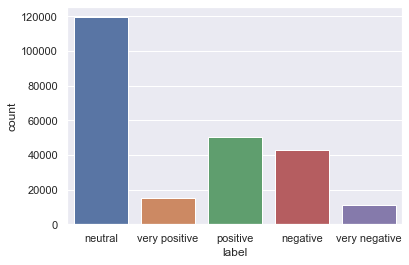

In [33]:
sns.countplot(x = df3['label'])

# Sentiment Values

/Users/azamkhan/opt/anaconda3/envs/dme/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


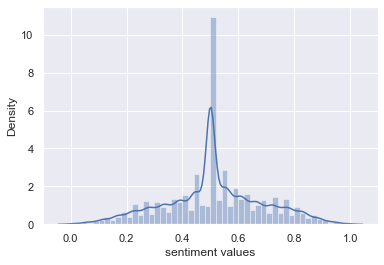

In [52]:
fig, ax = plt.subplots()
sns.distplot(df3['sentiment values'], ax=ax);

In [34]:
df3.describe()

,phrase ids,sentiment values
count,239231.000000,239231.000000
mean,119616.000000,0.513001
std,69060.185462,0.175356
min,1.000000,0.000000
25%,59808.500000,0.416670
50%,119616.000000,0.500000
75%,179423.500000,0.611110
max,239231.000000,1.000000


/Users/azamkhan/opt/anaconda3/envs/dme/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/azamkhan/opt/anaconda3/envs/dme/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/azamkhan/opt/anaconda3/envs/dme/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a fi

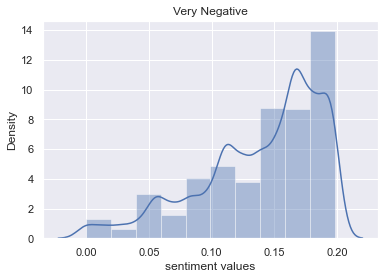

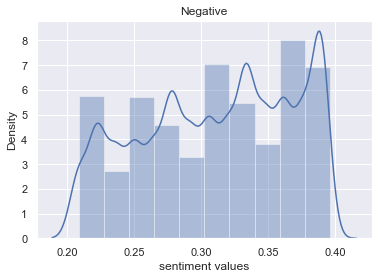

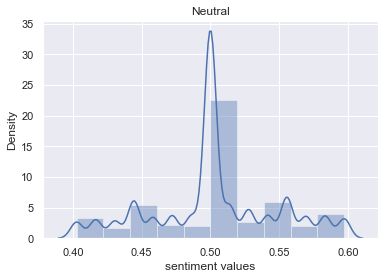

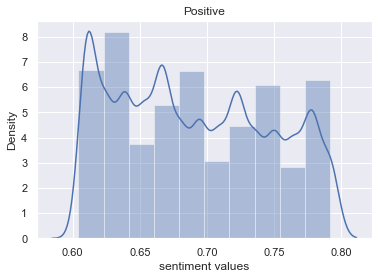

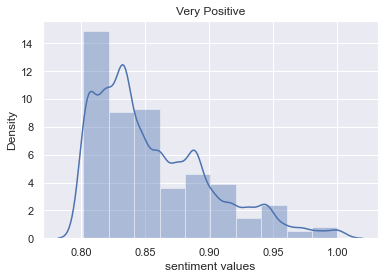

In [49]:
fig, ax = plt.subplots()
sns.distplot(df3[df3['label'] == 'very negative']['sentiment values'], ax=ax, bins = 10).set_title('Very Negative');

fig, ax = plt.subplots()
sns.distplot(df3[df3['label'] == 'negative']['sentiment values'], ax=ax, bins = 10).set_title('Negative');

fig, ax = plt.subplots()
sns.distplot(df3[df3['label'] == 'neutral']['sentiment values'], ax=ax, bins = 10).set_title('Neutral');

fig, ax = plt.subplots()
sns.distplot(df3[df3['label'] == 'positive']['sentiment values'], ax=ax, bins = 10).set_title('Positive');

fig, ax = plt.subplots()
sns.distplot(df3[df3['label'] == 'very positive']['sentiment values'], ax=ax, bins = 10).set_title('Very Positive');

In [54]:
from wordcloud import WordCloud

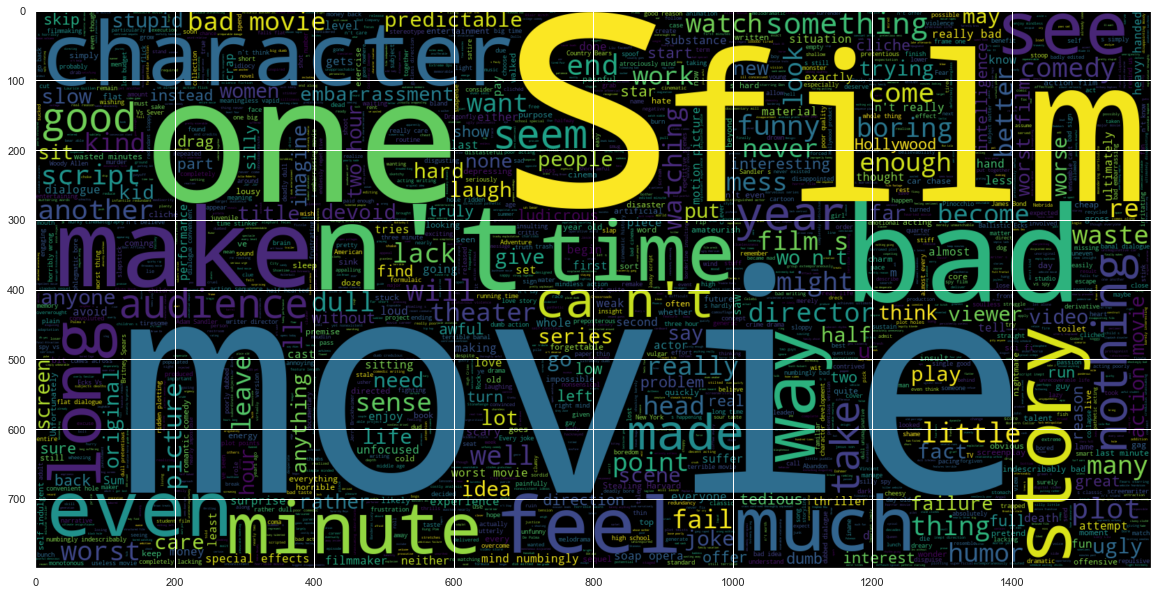

In [57]:
plt.figure(figsize = (20,20)) # Positive Review Text
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df3[df3['label'] == 'very negative'].body_text))
plt.imshow(wc , interpolation = 'bilinear')